## Electricity Consumption Exploration

---

![](https://images.unsplash.com/photo-1487875961445-47a00398c267?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1650&q=80)
Photo by [Jason Blackeye](https://unsplash.com/photos/nyL-rzwP-Mk)

In this exercise, you will be asked to explore time series data in several ways.

You will be working with time series of Open Power System Data ([OPSD](https://open-power-system-data.org/)) for Germany. 

The data set includes daily electricity consumption, wind power production, and solar power production between 2006 and 2017. 
```
- Date — The date (yyyy-mm-dd format)
- Consumption — Electricity consumption in GWh
- Wind — Wind power production in GWh
- Solar — Solar power production in GWh
- Wind+Solar — Sum of wind and solar power production in GWh
```

# Data Exploration

In [4]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [110]:
# Load file
df = pd.read_csv('opsd_germany_daily.csv')
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [6]:
# Description
df.describe()

,Consumption,Wind,Solar,Wind+Solar
count,4383.000000,2920.000000,2188.000000,2187.000000
mean,1338.675836,164.814173,89.258695,272.663481
std,165.775710,143.692732,58.550099,146.319884
min,842.395000,5.757000,1.968000,21.478000
25%,1217.859000,62.353250,35.179250,172.185500
50%,1367.123000,119.098000,86.407000,240.991000
75%,1457.761000,217.900250,135.071500,338.988000
max,1709.568000,826.278000,241.580000,851.556000


Then, make sure to transform the dates into datetime format in pandas :

In [108]:
# Transform the dates into datetime format
...
df['Date']=pd.to_datetime(df['Date'], format='%Y-%m-%d')
type(df.index)

pandas.core.indexes.range.RangeIndex

### 1. Plotting and understanding a time series

Q1 - Plot the different time series. What do you understand, what do you notice ?

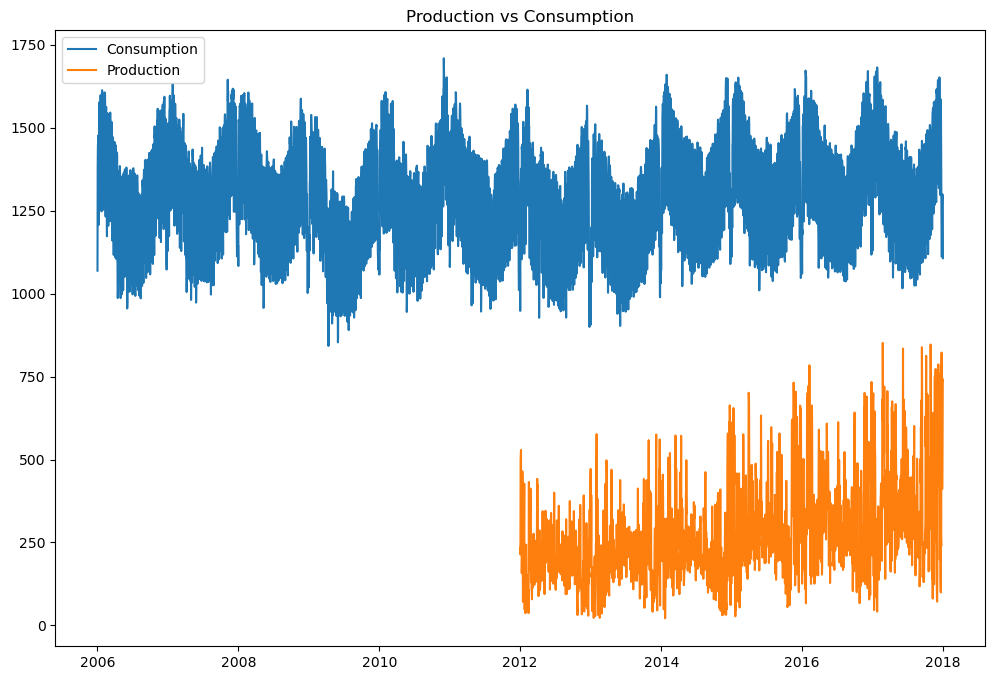

In [15]:
plt.plot(df['Date'], df['Consumption'], label="Consumption")
plt.plot(df['Date'], df['Wind+Solar'], label="Production")
plt.title('Production vs Consumption')
plt.legend()
plt.figure(figsize=(12,8))
plt.show()

We can also avoid plotting lines and simply plot dots for the consumption :

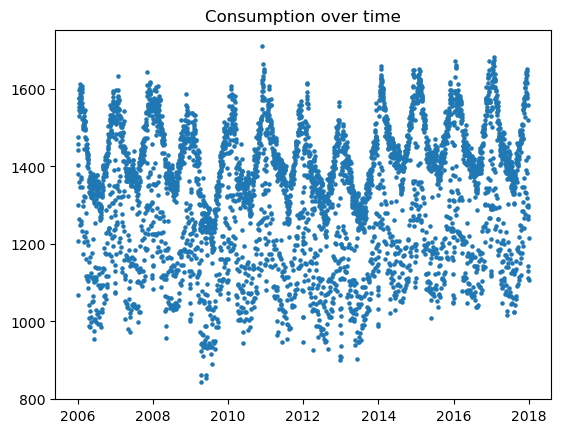

<Figure size 1200x800 with 0 Axes>

In [32]:
plt.scatter(df['Date'], df['Consumption'], label="Consumption", s=5)
plt.title('Consumption over time')
plt.figure(figsize=(12,8))
plt.show()

And plot the production over time :

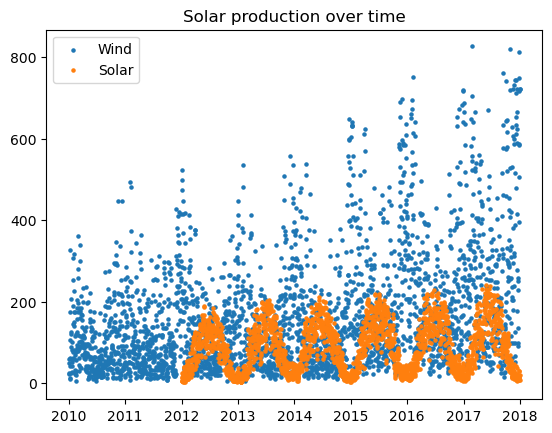

<Figure size 1200x800 with 0 Axes>

In [30]:
plt.scatter(df['Date'], df['Wind'], label="Wind", s=5)
plt.scatter(df['Date'], df['Solar'], label="Solar",s=5)
plt.legend()
plt.title("Solar production over time")
...
plt.figure(figsize=(12,8))
plt.show()

What can we notice ?
+ the consumption is larger than the production
+ we have no overall production data before 2012
+ the production and the consumption are both seasonal, i.e. they vary within a year given some pattern
+ there is a trend in production (the higher part), and outliers downwards

How do consumption and production compare ?
+ We notice that wind bsaed production increases over time, and is rather high in winter (for example more storms).
+ On the other hand, the solar production is higher in summer (seems logic)
+ The consumption is higher in winter

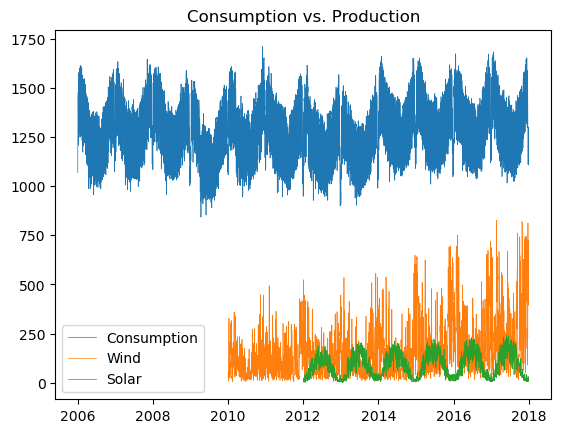

<Figure size 1200x800 with 0 Axes>

In [38]:
plt.plot(df['Date'], df['Consumption'], label="Consumption",linewidth=0.5)
plt.plot(df['Date'], df['Wind'], label="Wind",linewidth=0.5)
plt.plot(df['Date'], df['Solar'], label="Solar",linewidth=0.5)
plt.title('Consumption vs. Production')
plt.legend()
plt.figure(figsize=(12,8))
...
plt.show()

### 2. Change the scale

Q2 - Try to change the scale to understand the recurrent patterns !

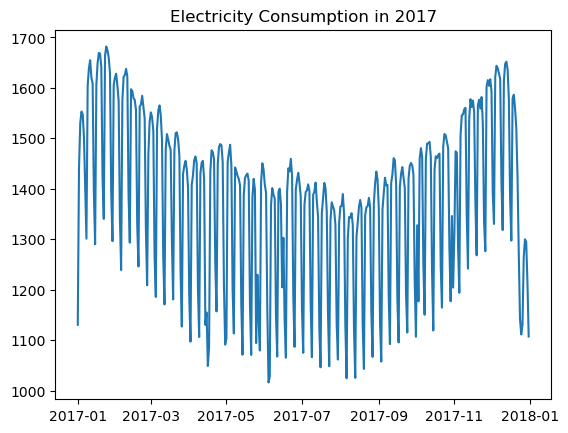

<Figure size 1200x800 with 0 Axes>

In [56]:
# Plot over the year
filtered_data=df[(df['Date']>='2017-01-01')&(df['Date']<='2018-01-01')]
plt.plot(filtered_data['Date'], filtered_data['Consumption'])
plt.title("Electricity Consumption in 2017")
plt.figure(figsize=(12,8))
...
plt.show()

It confirms the trend : more consumption in winter time, and less in summer. We can then zoom on a given month :

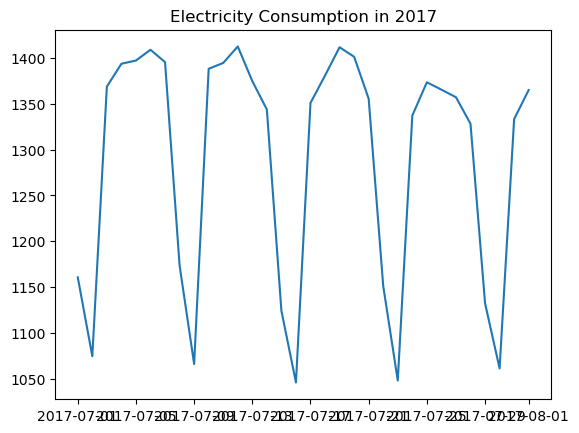

<Figure size 1200x800 with 0 Axes>

In [60]:
# Plot over a month
filtered_data=df[(df['Date']>='2017-07-01')&(df['Date']<='2017-08-01')]
plt.plot(filtered_data['Date'], filtered_data['Consumption'])
plt.title("Electricity Consumption in 2017")
plt.figure(figsize=(12,8))
...
plt.show()

When zooming on a month, we oberve another seasonality. There seems to be days of the week in which people consume less. For example, here's what happens when we highlight Sundays :

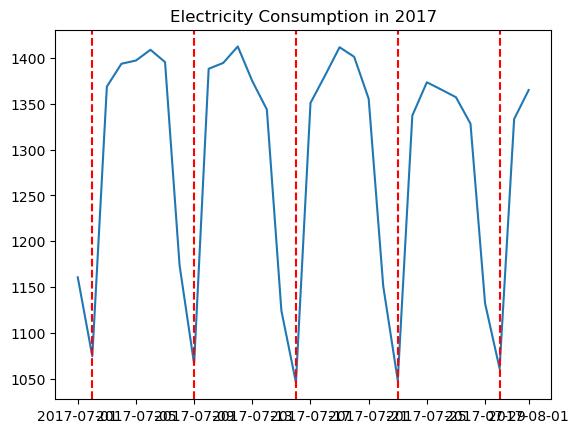

<Figure size 1200x800 with 0 Axes>

In [72]:
# Plot on Sundays
filtered_data=df[(df['Date']>='2017-07-01')&(df['Date']<='2017-08-01')]
plt.plot(filtered_data['Date'], filtered_data['Consumption'])
plt.title("Electricity Consumption in 2017")
sunday=2
while sunday<31:
    plt.axvline(x=pd.to_datetime('2017-07-'+str(sunday)), color='r', linestyle='--')
    sunday+=7
plt.figure(figsize=(12,8))
...
plt.show()

### 3. Further exploration

Q3 - To further explore the dataset, we might need to group the data. Create new columns for the consumption (by year and month), and create box-plots with seaborn. Comment on your results.

In [88]:
# new columns 'year' and 'month'
df_2 = df.reset_index()
df_2['year'] = df['Date'].dt.year
df_2['month'] = df['Date'].dt.month_name().str[:3]
years = df_2['year'].unique()
print(years)
df_2.head()

[2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]


,index,Date,Consumption,Wind,Solar,Wind+Solar,year,month
0,0,2006-01-01,1069.184,NaN,NaN,NaN,2006,Jan
1,1,2006-01-02,1380.521,NaN,NaN,NaN,2006,Jan
2,2,2006-01-03,1442.533,NaN,NaN,NaN,2006,Jan
3,3,2006-01-04,1457.217,NaN,NaN,NaN,2006,Jan
4,4,2006-01-05,1477.131,NaN,NaN,NaN,2006,Jan


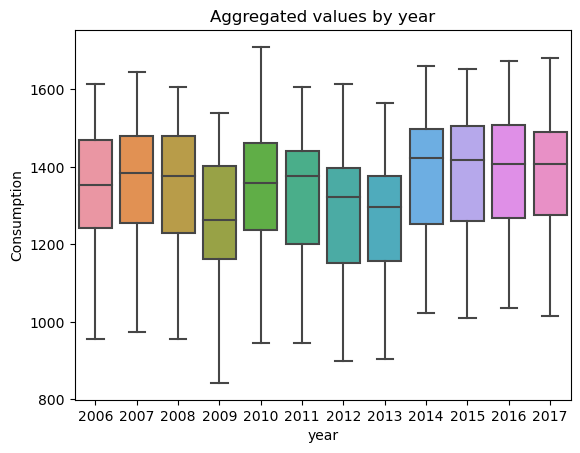

<Figure size 1200x800 with 0 Axes>

In [84]:
# Boxplot year
import seaborn as sns
sns.boxplot(x=df_2['year'], y=df_2['Consumption'])
plt.title('Aggregated values by year')
plt.figure(figsize=(12,8))
...
plt.show()

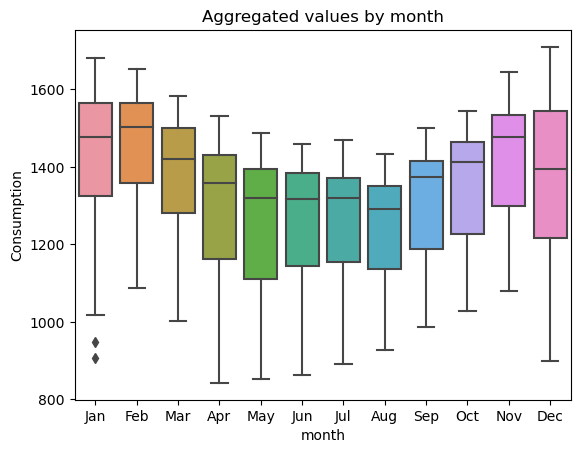

<Figure size 1200x800 with 0 Axes>

In [90]:
# Boxplot month
sns.boxplot(x=df_2['month'], y=df_2['Consumption'])
plt.title('Aggregated values by month')
plt.figure(figsize=(12,8))
...
plt.show()

### 4. Fill missing values

Q4 - Do you face missing values in production ? If yes, which method can you apply ? What happens if you plot the modified data ? It is a good idea to keep the data this way ?

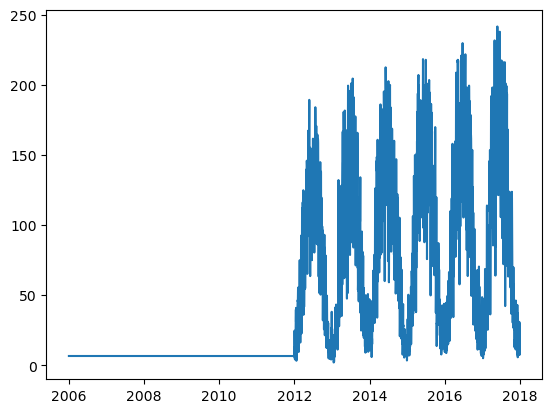

<Figure size 1200x800 with 0 Axes>

In [106]:
# Plot Solar
df_3=df.bfill()
plt.plot(df_3['Date'], df_3['Solar'])
plt.figure(figsize=(12,8))
...
plt.show()

The forward and backward fill are useful when some values are missing within the data, not when we miss years of data. This is a clear illustration.

### 5. Series correlation

Q5 - A good way to explore time series, when you have several series, is to plot one series vs another. This is a good way to estimate the correlation between 2 series. Plot the relevant graphs (and compute the correlation) for wind + solar vs consumption, wind vs solar, wind vs consumption, and solar vs consumption.

In [114]:
# Correlation between consumption and overall production
...
df['Consumption'].corr(df['Wind+Solar'])

0.027647843859240896

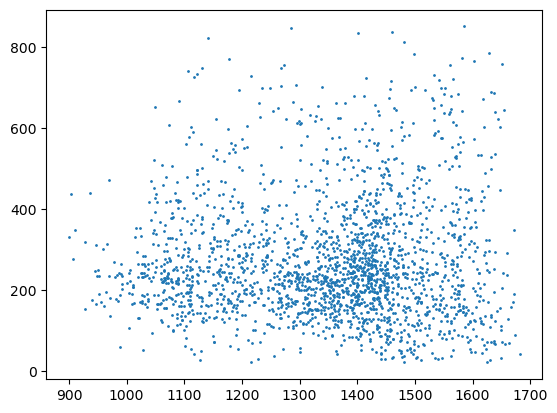

<Figure size 1200x800 with 0 Axes>

In [126]:
# Plot
plt.scatter(df['Consumption'],df['Wind+Solar'],s=1)
plt.figure(figsize=(12,8))
...
plt.show()

In [116]:
# Correlation between solar production and wind production
...
df['Solar'].corr(df['Wind'])

-0.308831829597734

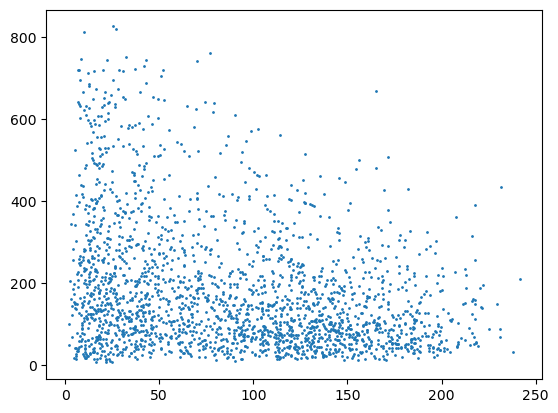

<Figure size 1200x800 with 0 Axes>

In [128]:
# Plot
plt.scatter(df['Solar'],df['Wind'],s=1)
plt.figure(figsize=(12,8))
...
plt.show()

In [118]:
# Correlation between consumption and wind production
...
df['Consumption'].corr(df['Wind'])

0.13682075809765848

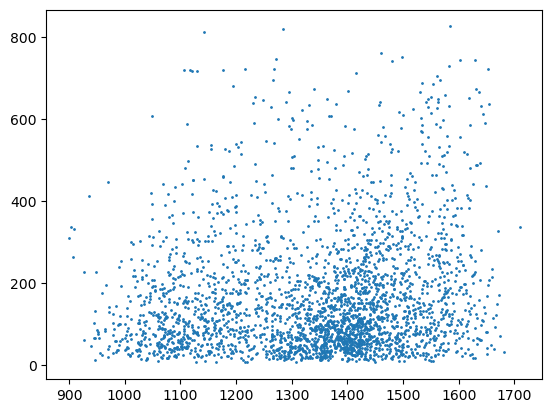

<Figure size 1200x800 with 0 Axes>

In [130]:
# Plot
plt.scatter(df['Consumption'],df['Wind'],s=1)
plt.figure(figsize=(12,8))
...
plt.show()

In [120]:
# Correlation between consumption and solar production
...
df['Consumption'].corr(df['Solar'])

-0.27894265519914385

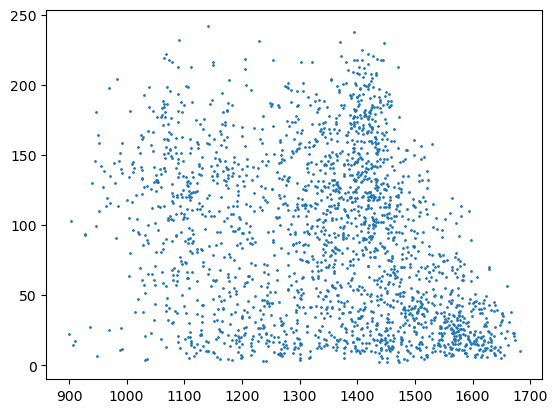

<Figure size 1200x800 with 0 Axes>

In [132]:
# Plot
plt.scatter(df['Consumption'],df['Solar'],s=1)
plt.figure(figsize=(12,8))
...
plt.show()